In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
bitcoin_data = pd.read_csv('bitcoin.csv')
bitcoin_data.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [27]:
bitcoin_data.shape

(367, 2)

In [28]:
bitcoin_data.Date.tail()

362    5/19/2020
363    5/20/2020
364    5/21/2020
365    5/22/2020
366    5/23/2020
Name: Date, dtype: object

In [29]:
bitcoin_data.iloc[30:49]

,Date,Price
30,6/22/2019,10701.69141
31,6/23/2019,10855.37109
32,6/24/2019,11011.10254
33,6/25/2019,11790.91699
34,6/26/2019,13016.23145
35,6/27/2019,11182.80664
36,6/28/2019,12407.33203
37,6/29/2019,11959.37109
38,6/30/2019,10817.15527
39,7/1/2019,10583.13477


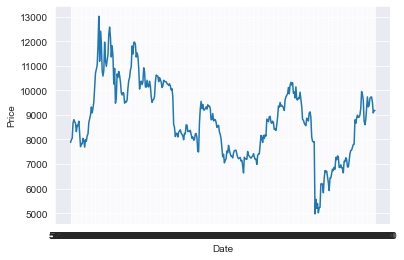

In [33]:
sns.set_style("darkgrid")
sns.lineplot(x='Date', y='Price', data=bitcoin_data)

plt.show()

In [34]:
bitcoin_data.drop(['Date'], axis=1, inplace=True)

## Create another column shifted 30 units up

In [35]:
prediction_days = 30
bitcoin_data['Prediction'] = bitcoin_data.Price.shift(-prediction_days)

In [36]:
bitcoin_data.head()

,Price,Prediction
0,7881.846680,10701.69141
1,7987.371582,10855.37109
2,8052.543945,11011.10254
3,8673.215820,11790.91699
4,8805.778320,13016.23145


In [38]:
bitcoin_data.tail(30)

,Price,Prediction
337,7550.900879,NaN
338,7569.936035,NaN
339,7679.867188,NaN
340,7795.601074,NaN
341,7807.058594,NaN
342,8801.038086,NaN
343,8658.553711,NaN
344,8864.766602,NaN
345,8988.596680,NaN
346,8897.468750,NaN


Create the independent data set.


Here we will convert the data frame into a numpy array and drop the prediction column


In [39]:
X = np.array(bitcoin_data.drop(['Prediction'], axis=1))
X

array([[ 7881.84668 ],
       [ 7987.371582],
       [ 8052.543945],
       [ 8673.21582 ],
       [ 8805.77832 ],
       [ 8719.961914],
       [ 8659.487305],
       [ 8319.472656],
       [ 8574.501953],
       [ 8564.016602],
       [ 8742.958008],
       [ 8208.995117],
       [ 7707.770996],
       [ 7824.231445],
       [ 7822.023438],
       [ 8043.951172],
       [ 7954.12793 ],
       [ 7688.077148],
       [ 8000.32959 ],
       [ 7927.714355],
       [ 8145.857422],
       [ 8230.923828],
       [ 8693.833008],
       [ 8838.375   ],
       [ 8994.488281],
       [ 9320.352539],
       [ 9081.762695],
       [ 9273.521484],
       [ 9527.160156],
       [10144.55664 ],
       [10701.69141 ],
       [10855.37109 ],
       [11011.10254 ],
       [11790.91699 ],
       [13016.23145 ],
       [11182.80664 ],
       [12407.33203 ],
       [11959.37109 ],
       [10817.15527 ],
       [10583.13477 ],
       [10801.67773 ],
       [11961.26953 ],
       [11215.4375  ],
       [109

In [44]:
X = X[:len(bitcoin_data)-prediction_days]
X # Except last 30 rows in Price column

array([[ 7881.84668 ],
       [ 7987.371582],
       [ 8052.543945],
       [ 8673.21582 ],
       [ 8805.77832 ],
       [ 8719.961914],
       [ 8659.487305],
       [ 8319.472656],
       [ 8574.501953],
       [ 8564.016602],
       [ 8742.958008],
       [ 8208.995117],
       [ 7707.770996],
       [ 7824.231445],
       [ 7822.023438],
       [ 8043.951172],
       [ 7954.12793 ],
       [ 7688.077148],
       [ 8000.32959 ],
       [ 7927.714355],
       [ 8145.857422],
       [ 8230.923828],
       [ 8693.833008],
       [ 8838.375   ],
       [ 8994.488281],
       [ 9320.352539],
       [ 9081.762695],
       [ 9273.521484],
       [ 9527.160156],
       [10144.55664 ],
       [10701.69141 ],
       [10855.37109 ],
       [11011.10254 ],
       [11790.91699 ],
       [13016.23145 ],
       [11182.80664 ],
       [12407.33203 ],
       [11959.37109 ],
       [10817.15527 ],
       [10583.13477 ],
       [10801.67773 ],
       [11961.26953 ],
       [11215.4375  ],
       [109

Create the dependent data set
 
 convert the data frame into a numpy array

In [45]:
y = np.array(bitcoin_data.Prediction)
y = y[:-prediction_days]# entire rows except last 30 rows in prediction column
y

array([10701.69141 , 10855.37109 , 11011.10254 , 11790.91699 ,
       13016.23145 , 11182.80664 , 12407.33203 , 11959.37109 ,
       10817.15527 , 10583.13477 , 10801.67773 , 11961.26953 ,
       11215.4375  , 10978.45996 , 11208.55078 , 11450.84668 ,
       12285.95801 , 12573.8125  , 12156.5127  , 11358.66211 ,
       11815.98633 , 11392.37891 , 10256.05859 , 10895.08984 ,
        9477.641602,  9693.802734, 10666.48242 , 10530.73242 ,
       10767.13965 , 10599.10547 , 10343.10645 ,  9900.767578,
        9811.925781,  9911.841797,  9870.303711,  9477.677734,
        9552.860352,  9519.145508,  9607.423828, 10085.62793 ,
       10399.66895 , 10518.17481 , 10821.72656 , 10970.18457 ,
       11805.65332 , 11478.16895 , 11941.96875 , 11966.40723 ,
       11862.93652 , 11354.02441 , 11523.5791  , 11382.61621 ,
       10895.83008 , 10051.7041  , 10311.5459  , 10374.33887 ,
       10231.74414 , 10345.81055 , 10916.05371 , 10763.23242 ,
       10138.04981 , 10131.05566 , 10407.96484 , 10159.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
predictionDays_array = np.array(bitcoin_data.drop(['Prediction'], axis=1))[-prediction_days:]
len(predictionDays_array)# last 30 rows

30

In [15]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [16]:
svr_rbf_confidence = svr_rbf.score(X_test, y_test)
print('svr_rbf accuracy: {}'.format(svr_rbf_confidence))

svr_rbf accuracy: 0.08431339649784908


In [17]:
svm_prediction = svr_rbf.predict(X_test)
svm_prediction

array([ 9162.24163687,  7367.49722327,  9727.12657326,  8688.8278372 ,
        8925.95500173,  8522.31772166,  7513.19509632,  9053.0780341 ,
        8268.39409981,  9708.19730608,  8500.93941415,  7954.62414233,
        8287.01019944,  8289.28397282,  8304.32954405,  9259.32652566,
        8915.11572747, 10629.91545486,  8553.76256803,  8592.94539942,
        8766.04145568, 10024.22207775,  8284.40062718,  9994.36425418,
        8356.50350659,  8339.69329189,  8990.59857438, 10374.15652588,
        8407.77710312, 10337.78492307,  7710.44046526,  8102.00864051,
        7931.40056238,  8335.68123528,  8607.90188189,  9131.08367963,
        9309.84450954,  8262.78783432,  9769.89736428,  9093.08203704,
        8093.22297512,  8295.0113225 ,  8124.48802194,  7963.692255  ,
       10060.10347   ,  8213.10597043, 10347.47660999,  9709.06980797,
        9098.45748379, 10402.03150517,  9354.51593914,  9178.71510377,
        9889.60014671,  8607.62971516,  8783.03578926,  7967.48593845,
      

In [18]:
y_test

array([ 9650.174805, 10666.48242 , 11941.96875 ,  8293.868164,
       10345.81055 ,  9268.761719,  7257.665039,  8245.915039,
        5200.366211,  9795.943359,  9686.441406,  7397.796875,
       10599.10547 ,  7909.729492,  8595.740234,  8027.268066,
        9870.303711, 10178.37207 ,  6416.314941,  7344.884277,
        9350.529297,  8577.975586,  9598.173828,  8309.286133,
       11182.80664 ,  8321.005859,  7463.105957, 11805.65332 ,
       10141.99609 ,  9607.423828,  6971.091797,  8658.553711,
        7320.145508,  8374.686523,  6716.44043 ,  8807.010742,
       10763.23242 , 10895.83008 , 11208.55078 ,  9081.761719,
        7424.29248 ,  9842.666016, 10131.05566 ,  7317.990234,
       11358.66211 ,  7217.427246, 10517.25488 , 10231.74414 ,
        7322.532227, 10198.24805 , 10208.23633 ,  8757.788086,
        7218.816406,  6681.062988,  9510.200195,  8745.894531,
       13016.23145 ,  8897.46875 ,  7202.844238,  7334.098633,
       10116.67383 ,  8491.992188,  9316.629883,  6734.

In [19]:
# Print the model predictions for the next 30 days
svm_prediction = svr_rbf.predict(predictionDays_array)
print(svm_prediction)
print()
#Print the actual price for bitcoin for last 30 days
print(bitcoin_data.tail(prediction_days))

[8046.6649969  8110.90342393 8764.76456643 9617.57642983 9686.92384358
 8048.06778022 8580.50119907 7810.39092755 7437.2247222  7695.44503381
 7644.86434786 7409.9466188  8142.8549371  8171.95779367 8111.25005893
 8834.97315843 8218.2833033  8767.75403515 8034.99270328 8150.83850991
 8294.83073303 8526.58581508 8797.85472714 8522.89240068 8317.10882055
 8309.30559192 9035.23085894 7367.49644563 7644.95746951 7633.30174143]

           Price  Prediction
337  7550.900879         NaN
338  7569.936035         NaN
339  7679.867188         NaN
340  7795.601074         NaN
341  7807.058594         NaN
342  8801.038086         NaN
343  8658.553711         NaN
344  8864.766602         NaN
345  8988.596680         NaN
346  8897.468750         NaN
347  8912.654297         NaN
348  9003.070313         NaN
349  9268.761719         NaN
350  9951.518555         NaN
351  9842.666016         NaN
352  9593.896484         NaN
353  8756.430664         NaN
354  8601.795898         NaN
355  8804.477539     